In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

def date2int(date_obj):
    string = str(date_obj)
    return int("".join(string.split(" ")[0].split("-")))

def delete_zero(df):
    for i in df:
        df[i] = df[i].fillna(0)
        if (df[i] == 0).all():
            del df[i]
    return df

E:\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [35]:
def optimize(y, x, lmbda, learn_rate, criteria):
    w = np.random.rand(x.shape[1], 1)
    last_loss = 0.0
    loss = criteria + last_loss
    while abs(loss - last_loss) >= criteria:
        gradient = 2 * x.T.dot(x).dot(w) - 2 * x.T.dot(y) + 2 * lmbda * w
        w = w - gradient * learn_rate
        w[w < 0.0] = 0.0
        last_loss = loss
        loss = sum((y - x.dot(w))**2) + lmbda * w.T.dot(w)
    return w

In [16]:
df_cta = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="cta").iloc[:, :2]
df_cta["date"] = df_cta["date"].apply(date2int)
df_cta["NPV"] = df_cta["NPV"].pct_change()
df_5_13 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="5-13")
df_10_20 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="10-20")
df_20_50 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="20-50")
df_50_100 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="50-100")

first, we need to concate df_cta with df_myself

In [106]:
def prepare_data_and_plot(df, df_name, lmbda, learn_rate, stop_rate, lag):
    df = delete_zero(df)
    df_concated = pd.merge(df_cta, df, on="date", how="left").dropna()
    df_concated.iloc[:, 2:] = df_concated.iloc[:, 2:] / 1e7
    
    date = df_concated.iloc[:, 0].values
    y = df_concated.iloc[:, 1].values
    y.shape = (-1, 1)
    x = df_concated.iloc[:, 2:].values
    w = np.zeros_like(x.T)
    
    for i in xrange(len(x)):
        if i < lag:
            continue
        w_tmp = optimize(y[i-lag : i], x[i-lag : i, :], lmbda, learn_rate, stop_rate)
        w_tmp.shape = (-1, 1)
        print w_tmp.shape
        w[:, i] = w_tmp
    
    y_estimate = np.diag(x.dot(w))
    
    fig2 = plt.figure(figsize=(20, 10))
    plt.plot(y_estimate.cumsum())
    #fig2.savefig("./Pics/{}.png".format(df_name))
    plt.show()
    
    fig1 = plt.figure(figsize=(20, 10))
    plt.plot(y.cumsum())
    #fig1.savefig("./Pics/{}.png".format('y'))
    plt.show()
    
    return w

In [104]:
def prepare_data_and_plot_lasso(df, df_name, lmbda, learn_rate, stop_rate, lag):
    df = delete_zero(df)
    df_concated = pd.merge(df_cta, df, on="date", how="left").dropna()
    df_concated.iloc[:, 2:] = df_concated.iloc[:, 2:] / 1e7
    
    date = df_concated.iloc[:, 0].values
    y = df_concated.iloc[:, 1].values
    y.shape = (-1, 1)
    x = df_concated.iloc[:, 2:].values
    w = np.zeros_like(x.T)
    
    for i in xrange(len(x)):
        if i < lag:
            continue
        w_tmp = optimize(y[i-lag : i], x[i-lag : i, :], lmbda, learn_rate, stop_rate)
        w_tmp.shape = (-1, 1)
        w[:, i] = w_tmp
    
    y_estimate = np.diag(x.dot(w))
    
    fig2 = plt.figure(figsize=(20, 10))
    plt.plot(y_estimate.cumsum())
    #fig2.savefig("./Pics/{}.png".format(df_name))
    plt.show()
    
    fig1 = plt.figure(figsize=(20, 10))
    plt.plot(y.cumsum())
    #fig1.savefig("./Pics/{}.png".format('y'))
    plt.show()
    
    return w

In [107]:
w = prepare_data_and_plot(df_20_50, "", learn_rate=1e-3, stop_rate=1e-4, lmbda=0.8, lag=60)

(26L, 1L)
<type 'numpy.ndarray'>


ValueError: could not broadcast input array from shape (26,1) into shape (26)

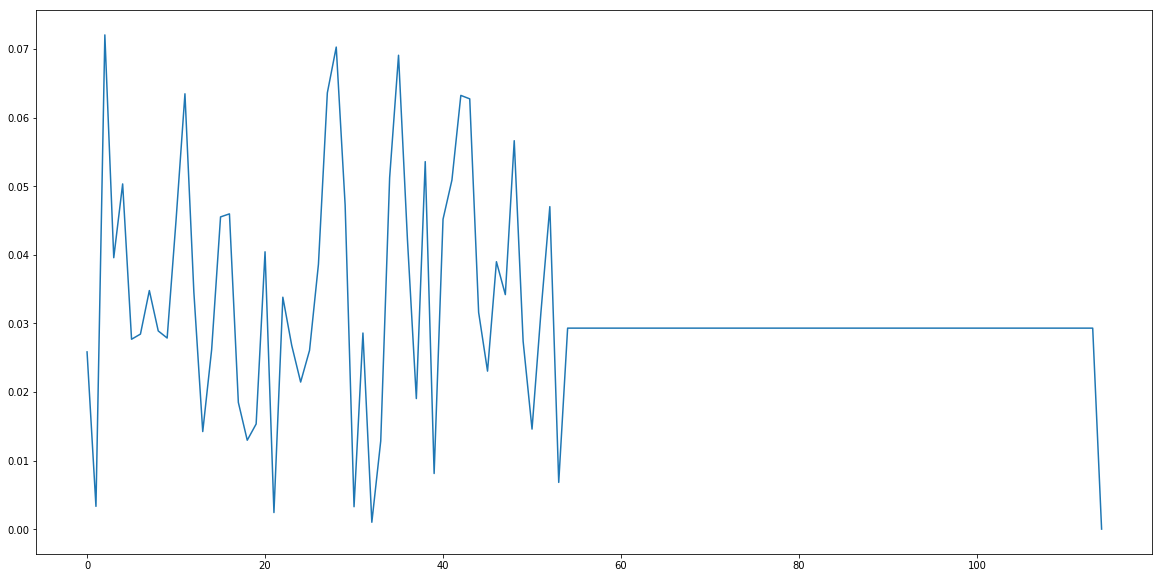

In [92]:
fig = plt.figure(figsize=(20, 10))
plt.plot(w[24, :])